In [1]:
# © MIT Introduction to Deep Learning
# http://introtodeeplearning.com

In [2]:
%load_ext autoreload
%autoreload 2

In [30]:
import torch
import torch.nn as nn

# Download and import the MIT Introduction to Deep Learning package
# !pip install mitdeeplearning --quiet
import mitdeeplearning as mdl

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
integer = torch.tensor(1234)
decimal = torch.tensor(3.14159265359)

print(f"`integer` is a {integer.ndim}-d Tensor: {integer}")
print(f"`decimal` is a {decimal.ndim}-d Tensor: {decimal}")

`integer` is a 0-d Tensor: 1234
`decimal` is a 0-d Tensor: 3.1415927410125732


In [5]:
fibonacci = torch.tensor([1, 1, 2, 3, 5, 8])
count_to_100 = torch.tensor(range(100))

print(f"`fibonacci` is a {fibonacci.ndim}-d Tensor with shape: {fibonacci.shape}")
print(f"`count_to_100` is a {count_to_100.ndim}-d Tensor with shape: {count_to_100.shape}")

`fibonacci` is a 1-d Tensor with shape: torch.Size([6])
`count_to_100` is a 1-d Tensor with shape: torch.Size([100])


In [6]:
### Defining higher-order Tensors ###

'''TODO: Define a 2-d Tensor'''
matrix = torch.Tensor(torch.rand(4,4))

assert isinstance(matrix, torch.Tensor), "matrix must be a torch Tensor object"
assert matrix.ndim == 2

'''TODO: Define a 4-d Tensor.'''
# Use torch.zeros to initialize a 4-d Tensor of zeros with size 10 x 3 x 256 x 256.
#   You can think of this as 10 images where each image is RGB 256 x 256.
images = torch.Tensor(torch.zeros(10,3,256,256))

assert isinstance(images, torch.Tensor), "images must be a torch Tensor object"
assert images.ndim == 4, "images must have 4 dimensions"
assert images.shape == (10, 3, 256, 256), "images is incorrect shape"
print(f"images is a {images.ndim}-d Tensor with shape: {images.shape}")


images is a 4-d Tensor with shape: torch.Size([10, 3, 256, 256])


In [7]:
row_vector = matrix[1]
column_vector = matrix[:, 1]
scalar = matrix[0, 1]

print(f"`row_vector`: {row_vector}")
print(f"`column_vector`: {column_vector}")
print(f"`scalar`: {scalar}")

`row_vector`: tensor([0.3495, 0.8954, 0.2991, 0.1698])
`column_vector`: tensor([0.4749, 0.8954, 0.6826, 0.4814])
`scalar`: 0.4748848080635071


In [8]:
# Create the nodes in the graph and initialize values
a = torch.tensor(15)
b = torch.tensor(61)

# Add them!
c1 = torch.add(a, b)
c2 = a + b  # PyTorch overrides the "+" operation so that it is able to act on Tensors
print(f"c1: {c1}")
print(f"c2: {c2}")

c1: 76
c2: 76


In [9]:
### Defining Tensor computations ###

# Construct a simple computation function
def func(a, b):
    '''TODO: Define the operation for c, d, e.'''
    c = a + b
    d = b - 1
    e = c * d
    return e

In [10]:
# Consider example values for a,b
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a, b)
print(f"e_out: {e_out}")

e_out: 6.0


In [13]:
### Defining a dense layer ###

# num_inputs: number of input nodes
# num_outputs: number of output nodes
# x: input to the layer

class OurDenseLayer(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(OurDenseLayer, self).__init__()
        # Define and initialize parameters: a weight matrix W and bias b
        # Note that the parameter initialize is random!
        self.W = torch.nn.Parameter(torch.randn(num_inputs, num_outputs))
        self.bias = torch.nn.Parameter(torch.randn(num_outputs))

    def forward(self, x):
        '''TODO: define the operation for z (hint: use torch.matmul).'''
        z = torch.matmul(x, self.W) + self.bias

        '''TODO: define the operation for out (hint: use torch.sigmoid).'''
        y = torch.sigmoid(z)
        return y

In [14]:
# Define a layer and test the output!
num_inputs = 2
num_outputs = 3
layer = OurDenseLayer(num_inputs, num_outputs)
x_input = torch.tensor([[1, 2.]])
y = layer(x_input)

print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.8835, 0.1339, 0.0199]], grad_fn=<SigmoidBackward0>)


In [16]:
### Defining a neural network using the PyTorch Sequential API ###

# define the number of inputs and outputs
n_input_nodes = 2
n_output_nodes = 3

# Define the model
'''TODO: Use the Sequential API to define a neural network with a
    single linear (dense!) layer, followed by non-linearity to compute z'''
model = nn.Sequential(nn.Linear(n_input_nodes, n_output_nodes),
                      nn.ReLU())

In [18]:
# Test the model with example input
x_input = torch.tensor([[1, 2.]])
model_output = model(x_input)
print(f"input shape: {x_input.shape}")
print(f"output shape: {model_output.shape}")
print(f"output result: {model_output}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.2320, 0.2983, 0.1037]], grad_fn=<ReluBackward0>)


In [21]:
### Defining a model using subclassing ###

class LinearWithSigmoidActivation(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearWithSigmoidActivation, self).__init__()
        '''TODO: define a model with a single Linear layer and sigmoid activation.'''
        self.linear = nn.Linear(num_inputs, num_outputs)
        self.activation = nn.Sigmoid()

    def forward(self, inputs):
        linear_output = self.linear(inputs)
        output = self.activation(linear_output)
        return output

In [22]:
n_input_nodes = 2
n_output_nodes = 3
model = LinearWithSigmoidActivation(n_input_nodes, n_output_nodes)
x_input = torch.tensor([[1, 2.]])
y = model(x_input)
print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.6588, 0.7410, 0.7386]], grad_fn=<SigmoidBackward0>)


In [25]:
### Custom behavior with subclassing nn.Module ###

class LinearButSometimesIdentity(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearButSometimesIdentity, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    '''TODO: Implement the behavior where the network outputs the input, unchanged,
        under control of the isidentity argument.'''
    def forward(self, inputs, isidentity=False):
      return inputs if isidentity else self.linear(inputs)

In [26]:
# Test the IdentityModel
model = LinearButSometimesIdentity(num_inputs=2, num_outputs=3)
x_input = torch.tensor([[1, 2.]])

'''TODO: pass the input into the model and call with and without the input identity option.'''
out_with_linear = model(x_input, isidentity=False)

out_with_identity = model(x_input, isidentity=True)


print(f"input: {x_input}")
print("Network linear output: {}; network identity output: {}".format(out_with_linear, out_with_identity))

input: tensor([[1., 2.]])
Network linear output: tensor([[-0.5738,  0.4356, -1.5597]], grad_fn=<AddmmBackward0>); network identity output: tensor([[1., 2.]])


In [27]:
### Gradient computation ###

# y = x^2
# Example: x = 3.0
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2
y.backward()  # Compute the gradient

dy_dx = x.grad
print("dy_dx of y=x^2 at x=3.0 is: ", dy_dx)
assert dy_dx == 6.0

dy_dx of y=x^2 at x=3.0 is:  tensor(6.)


Initializing x=-0.3397447168827057


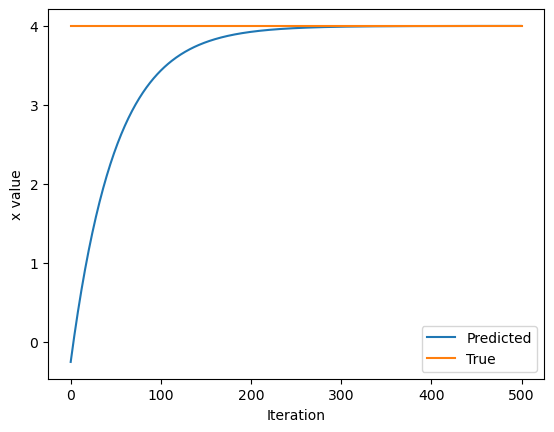

In [32]:
### Function minimization with autograd and gradient descent ###

# Initialize a random value for our intial x
x = torch.randn(1)
print(f"Initializing x={x.item()}")

learning_rate = 1e-2  # Learning rate
history = []
x_f = 4  # Target value


# We will run gradient descent for a number of iterations. At each iteration, we compute the loss,
#   compute the derivative of the loss with respect to x, and perform the update.
for i in range(500):
    x = torch.tensor([x], requires_grad=True)

    # TODO: Compute the loss as the square of the difference between x and x_f
    loss = (x - x_f)**2

    # Backpropagate through the loss to compute gradients
    loss.backward()

    # Update x with gradient descent
    x = x.item() - learning_rate * x.grad

    history.append(x.item())

# Plot the evolution of x as we optimize toward x_f!
plt.plot(history)
plt.plot([0, 500], [x_f, x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()